# Run  soil_raster_prep and soil_parameters

#### Prepares the soil rasters, such as clipping to the grid and filling missing data in the soil data set. The soil_parameters script uses the prepared soil rasters to develop maps of soil texture, available water holding capacity, and the saturated hydraulic conductivity (Ksat). These values are used to develop PRMS soilzone parameters.

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [2]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [3]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

['..\\examples\\sagehen\\sagehen_parameters_orig.ini']

#### Values set below are required for running the soil_raster_prep script.

In [4]:
# Set problem specific variable values for script
soil_orig_folder = r"..\examples\sagehen\soils"
ksat_name = "ksat.img"
awc_name = "awc.img"
clay_pct_name = "clay.img"
sand_pct_name = "sand.img"
soil_cellsize = 50
# Soil rasters are percent (i.e. 25%)
# If false interpret as decimals (i.e. 0.25)
soil_pct_flag = True
# Fill nodata in soil rasters using nibble technique
fill_soil_nodata_flag = True
# Initial soil moisture and recharge are calculated as a fraction of the max
moist_init_ratio = 0.1
rechr_init_ratio = 0.1
# Geology based multiplier raster for ssr2gw rate 
ssr2gw_mult_flag = False
ssr2gw_mult_name = "ssr2g_mult.img"
# If no raster provided, a default value must be set
ssr2gw_k_default = 0.001
# Read and apply soil depth raster
# Otherwise soil depth will only be derived from rooting depth
soil_depth_flag = False
# soil_depth_name = soil_depth.img
root_depth_remap = "rtdepth.rmp"

In [5]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','soil_orig_folder',soil_orig_folder)
Config.set('INPUTS','ksat_name',ksat_name)
Config.set('INPUTS','awc_name',awc_name)
Config.set('INPUTS','clay_pct_name',clay_pct_name)
Config.set('INPUTS','sand_pct_name',sand_pct_name)
Config.set('INPUTS','soil_cellsize',soil_cellsize)
Config.set('INPUTS','soil_pct_flag',soil_pct_flag)
Config.set('INPUTS','fill_soil_nodata_flag',fill_soil_nodata_flag)
Config.set('INPUTS','moist_init_ratio',moist_init_ratio)
Config.set('INPUTS','rechr_init_ratio',rechr_init_ratio)
Config.set('INPUTS','ssr2gw_mult_flag',ssr2gw_mult_flag)
Config.set('INPUTS','ssr2gw_mult_name',ssr2gw_mult_name)
Config.set('INPUTS','ssr2gw_k_default',ssr2gw_k_default)
Config.set('INPUTS','soil_depth_flag',soil_depth_flag)
Config.set('INPUTS','root_depth_remap',root_depth_remap)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArpcy script soil_raster_prep.

In [7]:
# Set and run soil_raster_prep script
%run ../scripts/soil_raster_prep.py -i ../examples/sagehen/sagehen_parameters.ini


################################################################################
Run Time Stamp:      2019-09-11 14:33:48.634000
Current Directory:   D:\Workspace\classes\gsflowID2447_classrepo\exercises\saghen_prms\notebook
Script:              soil_raster_prep.py

Prepare GSFLOW Soil Rasters

Projecting/clipping AWC raster
Projecting/clipping clay raster
Projecting/clipping sand raster
Projecting/clipping ksat raster

Filling soil nodata values using Nibble
  ..\examples\sagehen\hru_params\soil_rasters\awc.img
  ..\examples\sagehen\hru_params\soil_rasters\clay_pct.img
  ..\examples\sagehen\hru_params\soil_rasters\sand_pct.img
  ..\examples\sagehen\hru_params\soil_rasters\ksat.img


#### Run the GsflowArpcy script soil_parameters.

In [8]:
%run ../scripts/soil_parameters.py -i ../examples/sagehen/sagehen_parameters.ini


################################################################################
Run Time Stamp:      2019-09-11 14:34:09.843000
Current Directory:   D:\Workspace\classes\gsflowID2447_classrepo\exercises\saghen_prms\notebook
Script:              soil_parameters.py

GSFLOW Soil Parameters

Adding soil fields if necessary

Calculating zonal statistics
  AWC: MEAN
    ..\examples\sagehen\hru_params\soil_rasters\awc.img
  CLAY_PCT: MEAN
    ..\examples\sagehen\hru_params\soil_rasters\clay_pct.img
  KSAT: MEAN
    ..\examples\sagehen\hru_params\soil_rasters\ksat.img
  SAND_PCT: MEAN
    ..\examples\sagehen\hru_params\soil_rasters\sand_pct.img
  SOIL_RT_MX: MEAN
    ..\examples\sagehen\hru_params\veg_rasters\root_depth.img
  FIDS: 0-65000
    MEAN: AWC_0
    MEAN: CLAY_PCT_0
    MEAN: KSAT_0
    MEAN: SAND_PCT_0
    MEAN: SOIL_RT_MX_0
    Writing values to polygons
Calculating soil RECHR_MAX

Calculating SOIL_TYPE

Calculating MOIST_INIT as 0.1 * MOIST_MAX
Calculating RECHR_INIT as 0.1 * RE

#### The distribution of Ksat provided by the SSURGO data is shown below.

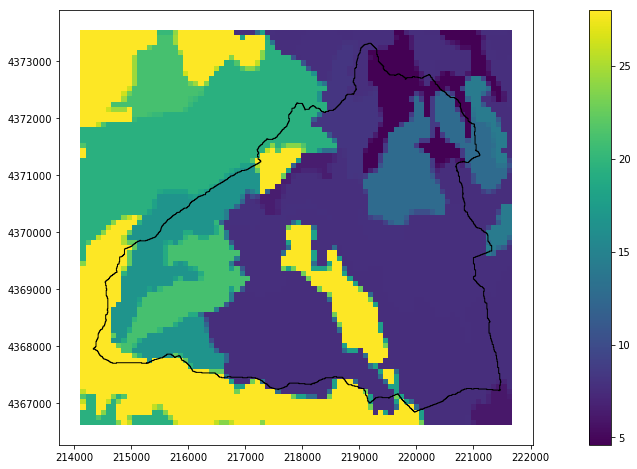

In [9]:
# Plot the Ksat provided by SSURGO
fig, ax = plt.subplots(figsize=(20,8))
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\hru_params.shp"
boundary=geopandas.read_file(fn1)
hru_params=geopandas.read_file(fn2)
hru_params.plot(column="KSAT",ax=ax,legend=True)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
plt.show()

## Class Exercise:


#### Plot the PRMS parameter slowcoef_lin ("SLOWCOEF_L"). Is it correlated to KSAT?